In [4]:
import os
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import FreqDist
import text2emotion as te
from LeXmo import LeXmo
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,Speech,Speech Word Frequency,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,NumWords,SpeechNormalize
0,trump: wow. whoa. that some group people. thou...,<FreqDist with 922 samples and 2793 outcomes>,0.010292,0.024700,0.004460,0.009777,0.019383,0.020926,0.060206,0.010978,0.021269,0.039280,4950,trump wow whoa that some group people thousand...
1,good evening. thank you very much speak you t...,<FreqDist with 608 samples and 1166 outcomes>,0.019704,0.034483,0.008867,0.027094,0.028571,0.033990,0.049754,0.019212,0.024138,0.044335,1813,good evening thank you very much speak you tod...
2,"thank you for the opportunity speak you, and t...",<FreqDist with 948 samples and 1745 outcomes>,0.011639,0.028128,0.004203,0.020045,0.021985,0.038797,0.054963,0.010023,0.009053,0.040414,2820,thank you for the opportunity speak you and th...
3,thank you for joining today. this was going sp...,<FreqDist with 742 samples and 1539 outcomes>,0.027550,0.017126,0.011541,0.036485,0.010052,0.044676,0.039836,0.022338,0.008563,0.032018,2438,thank you for joining today this was going spe...
4,today like share thoughts about the stakes thi...,<FreqDist with 877 samples and 1751 outcomes>,0.018206,0.030122,0.008275,0.023171,0.016220,0.038067,0.047004,0.019199,0.011917,0.039722,2743,today like share thoughts about the stakes thi...


### Case Study
jobs ~ people + hillary + american + country + isis + immigration + border

In [346]:
from collections import Counter, defaultdict
def get_words_paragraphs(words):
    
    word_para = defaultdict(list)
    for p in df['SpeechNormalize']:
        for w in words:
            word_para[w].append(p.count(w))
            
    return dict(word_para)

In [347]:
jobs_occurences = get_words_paragraphs(['jobs'])
people_occurences = get_words_paragraphs(['people'])
hillary_occurences = get_words_paragraphs(['hillary'])
american_occurences = get_words_paragraphs(['american'])
isis_occurences = get_words_paragraphs(['isis'])
immigration_occurences = get_words_paragraphs(['immigration'])
border_occurences = get_words_paragraphs(['border'])
country_occurences = get_words_paragraphs(['country'])
vote_occurences = get_words_paragraphs(['vote'])
government_occurences = get_words_paragraphs(['government'])
trade_occurences = get_words_paragraphs(['trade'])
great_occurences = get_words_paragraphs(['great'])
president_occurences = get_words_paragraphs(['president'])
clinton_occurences = get_words_paragraphs(['clinton'])
student_occurences = get_words_paragraphs(['student'])
know_occurences = get_words_paragraphs(['know'])
going_occurences = get_words_paragraphs(['going'])
america_occurences = get_words_paragraphs(['america'])

In [348]:
list_of_dict = [jobs_occurences,
               people_occurences,
               hillary_occurences,
               american_occurences,isis_occurences,
               immigration_occurences,
               border_occurences,
               country_occurences,
               vote_occurences,
               government_occurences,
               trade_occurences,
               great_occurences,
               president_occurences,
                clinton_occurences,
                student_occurences,know_occurences,going_occurences,america_occurences,
                
               ]

In [349]:
dfNegBio = pd.DataFrame()
for i in range (0, len(list_of_dict)):
    x = pd.DataFrame(list_of_dict[i])
    dfNegBio = pd.concat([dfNegBio,x], axis=1)



In [382]:
dfNegBio

,jobs,people,hillary,american,isis,immigration,border,country,vote,government,trade,great,president,clinton,student,know,going,america
0,14,55,0,1,5,2,7,28,2,3,9,41,10,1,0,48,44,9
1,0,7,1,4,1,0,0,0,0,0,0,7,13,1,0,11,8,9
2,6,4,2,18,6,3,3,8,0,2,9,7,18,7,0,10,7,40
3,0,33,17,17,5,21,4,19,0,1,0,3,14,19,0,12,5,35
4,15,18,49,20,7,6,3,16,4,9,7,12,11,50,0,11,13,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,10,21,3,9,0,0,1,14,0,2,1,15,2,4,0,2,15,11
70,12,23,24,10,2,2,4,8,12,3,4,19,2,9,0,24,44,20
71,10,22,28,18,7,3,9,18,18,5,2,22,7,18,0,19,48,32
72,13,54,24,8,6,1,5,28,12,4,6,38,3,16,0,35,91,19


array([[<AxesSubplot:title={'center':'jobs'}>,
        <AxesSubplot:title={'center':'people'}>,
        <AxesSubplot:title={'center':'hillary'}>,
        <AxesSubplot:title={'center':'american'}>],
       [<AxesSubplot:title={'center':'isis'}>,
        <AxesSubplot:title={'center':'immigration'}>,
        <AxesSubplot:title={'center':'border'}>,
        <AxesSubplot:title={'center':'country'}>],
       [<AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'government'}>,
        <AxesSubplot:title={'center':'trade'}>,
        <AxesSubplot:title={'center':'great'}>],
       [<AxesSubplot:title={'center':'president'}>,
        <AxesSubplot:title={'center':'clinton'}>,
        <AxesSubplot:title={'center':'student'}>,
        <AxesSubplot:title={'center':'know'}>],
       [<AxesSubplot:title={'center':'going'}>,
        <AxesSubplot:title={'center':'america'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

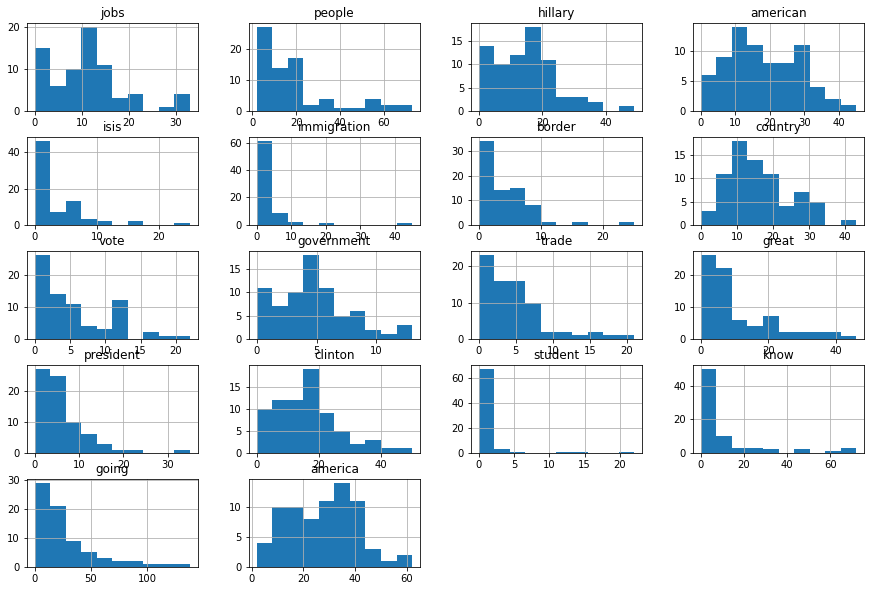

In [385]:
dfNegBio.hist(bins=10, figsize=(15, 10))

In [351]:
# Variables

expr = """jobs ~ people + hillary + american + country + isis + immigration + 
        border + vote + government + trade + great + president + clinton + student + know + going + america"""
   

In [352]:
y = dfNegBio[['jobs']]
X = dfNegBio[['people', 'hillary','american','isis','immigration','border'
              ,'country', 'vote' , 'government' , 'trade' , 'great', 'president', 
              'clinton', 'student', 'know' ,'going' ,'america']]

In [368]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [377]:
# Regression

nb_training_results = sm.GLM(y_train, X_train, family = sm.families.Gaussian()).fit()

print(nb_training_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   jobs   No. Observations:                   59
Model:                            GLM   Df Residuals:                       42
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                          21.310
Method:                          IRLS   Log-Likelihood:                -163.94
Date:                Wed, 07 Dec 2022   Deviance:                       895.02
Time:                        17:22:06   Pearson chi2:                     895.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7317
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
people         -0.2511      0.153     -1.646      

## Use the model to predict y's of the train set

In [378]:
nb_prediction_train = nb_training_results.get_prediction(X_train)

nb_summary_frame_train = nb_prediction_train.summary_frame()
predicted_counts_train = nb_summary_frame_train['mean']

# Accuracy of the train set

print("R-square of train set: ", round(r2_score(y_train, predicted_counts_train)*100, 2), "%")

R-square of train set:  63.97 %


## Use the model to predict y's of the test set

In [379]:
nb_prediction_test = nb_training_results.get_prediction(X_test)

nb_summary_frame_test = nb_prediction_test.summary_frame()
predicted_counts = nb_summary_frame_test['mean']
#Accuracy of the test set

print("R-square of train set: ", round(r2_score(y_test, predicted_counts)*100, 2), "%")

R-square of train set:  55.05 %


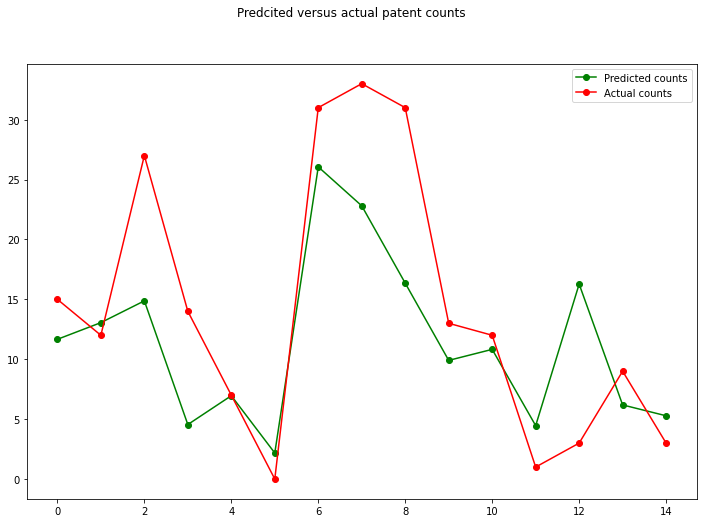

In [391]:
fig = plt.figure(figsize = (12, 8))

fig.suptitle('Predcited versus actual patent counts')
X_test.reset_index(inplace=True, drop=True)
predicted, = plt.plot(X_test.index, predicted_counts , 'go-', label = 'Predicted counts')
actual, = plt.plot(X_test.index, y_test['jobs'] , 'ro-', label = 'Actual counts')


plt.legend(handles = [predicted, actual])
plt.show()